**ML6 Понижение размерности**<br>
ПИ19-3 Деменчук Георгий

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

**1. Сформируйте случайную двумерную область точек**

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

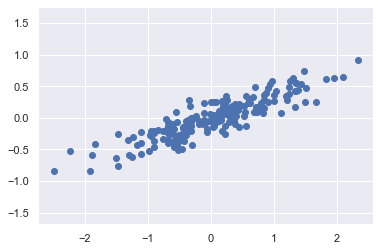

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2,200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

**2. Используйте метод главных компонент для понижения размерности**

In [3]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


**3. Инвертируйте данные полученные после понижения размерности и выведите их на график.**

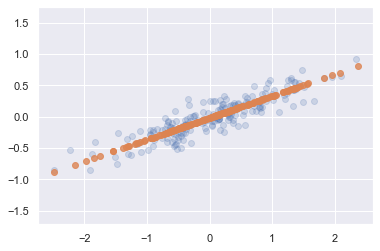

In [4]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');


**4. Скачайте датасет с цифрами (load_digits)**

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

**5. Используйте метод главных компонент для понижения размерности до 2**

In [6]:
pca = PCA(n_components=2)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print("original shape:   ", digits.data.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1797, 64)
transformed shape: (1797, 2)


In [7]:
print(pca.components_)

[[-1.68732410e-17 -1.73094639e-02 -2.23428829e-01 -1.35913306e-01
  -3.30323075e-02 -9.66340802e-02 -8.32943664e-03  2.26900081e-03
  -3.20516480e-04 -1.19308900e-01 -2.44451675e-01  1.48512744e-01
  -4.67319350e-02 -2.17740743e-01 -1.48136773e-02  4.47779520e-03
  -4.94136420e-05 -7.95419343e-02  8.33951429e-02  2.15915342e-01
  -1.72126801e-01 -1.63712098e-01  2.86444462e-02  4.23251808e-03
   9.85488539e-05  6.42319151e-02  2.54093319e-01 -3.56771020e-02
  -2.09462574e-01 -4.31311356e-02  5.13118724e-02  2.13422736e-04
  -0.00000000e+00  1.59950883e-01  3.68690779e-01  1.64406830e-01
   8.52007888e-02  3.72982876e-02  2.15866992e-02 -0.00000000e+00
   1.28865586e-03  1.06945285e-01  3.03067454e-01  2.47813045e-01
   2.09637298e-01  1.22325217e-02 -3.69458495e-02  1.61485034e-03
   6.93023561e-04 -8.35144242e-03 -5.58598990e-02  9.30534205e-02
   1.07387724e-01 -1.37734561e-01 -6.32879425e-02  9.61671584e-04
   9.55079073e-06 -1.40786829e-02 -2.35675481e-01 -1.41225592e-01
  -9.15964

In [8]:
print(pca.explained_variance_)

[179.0069301  163.71774688]


(-2.6557311679975117e-15,
 2.6859755403223877e-15,
 -0.7278269455715136,
 8.415610806931976)

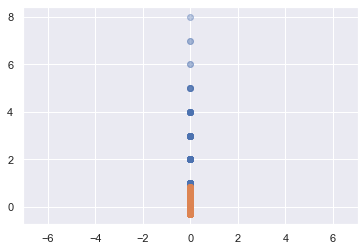

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(digits.data[:, 0], digits.data[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

**7. Используйте метод главных компонент с количеством компонентов – 64.**

In [10]:
pca = PCA(n_components=64)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print("original shape:   ", digits.data.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1797, 64)
transformed shape: (1797, 64)


(-2.5163220740207918e-27,
 1.5307143286570022e-27,
 -0.4000000000000168,
 8.400000000000016)

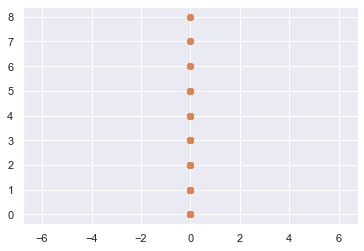

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(digits.data[:, 0], digits.data[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

**8. Постройте график объяснимости модели в зависимости от компонентов.**

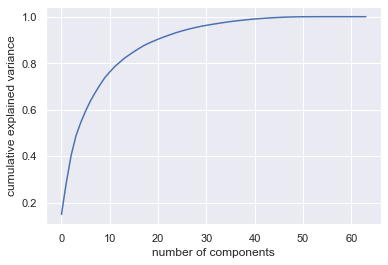

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**9. Добавьте шума в датасет. Выведите на экран обычные и зашумленные данные.**

Выводим на экран данные

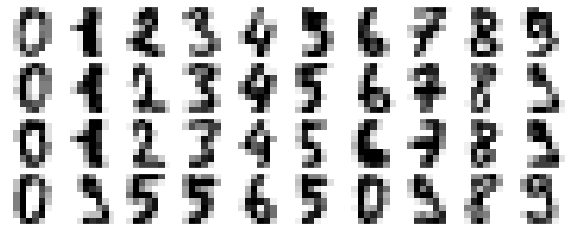

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Добавление шума в датасет

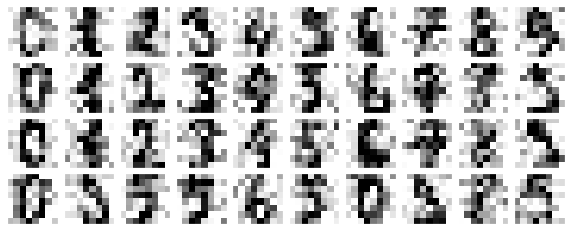

In [14]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

**10. Найти минимальное количество компонентов необходимое для сохранения хотя бы на 50% информации о датасете.**

In [15]:
pca = PCA(0.5).fit(noisy)

**11. Используйте метод главных компонент для понижения размерности с количеством компонент из пункта 10.**

In [16]:
pca = PCA(n_components=12)
pca.fit(noisy)
X_pca = pca.transform(noisy)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (1797, 12)


**12. Инвертируйте данные полученные после понижения размерности и выведите их на экран.**

In [17]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plots_digits(filtered)

NameError: name 'plots_digits' is not defined

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(noisy[:, 0], noisy[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

**13. Сделайте вывод о применимости модели**